<a href="https://colab.research.google.com/github/sajjadjim/Data-Minning-And-Machine-Learning/blob/main/Loan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier

In [ ]:
# 1. Load and Explore the Dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data (1).csv")
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

Dataset Head:
    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                

In [ ]:
x=data.drop("TARGET",axis=1)
x.head(15)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = data["TARGET"]
y.head(15)

,TARGET
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
data['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


In [ ]:
print(data.shape)

(307511, 122)


In [ ]:
data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
# 2. Data Preprocessing
# Handle missing values
# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=np.number).columns

# Apply imputation to numerical features
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

In [ ]:
# Now proceed with encoding categorical variables
label_encoders = {}
for name in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[name] = le.fit_transform(data[name])
    label_encoders[name] = le

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nProcessed Data Sample:\n", data_scaled.head())


Processed Data Sample:
    SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0   -1.733423  3.374485           -0.324395     1.388015     -0.717914   
1   -1.733413 -0.296342           -0.324395    -0.720370     -0.717914   
2   -1.733403 -0.296342            3.082659     1.388015      1.392925   
3   -1.733384 -0.296342           -0.324395    -0.720370     -0.717914   
4   -1.733374 -0.296342           -0.324395     1.388015     -0.717914   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         0.664531     -0.577538          0.142129   -0.478095    -0.166149   
1        -1.504820     -0.577538          0.426792    1.725450     0.592677   
2         0.664531     -0.577538         -0.427196   -1.152888    -1.404676   
3         0.664531     -0.577538         -0.142533   -0.711430     0.177869   
4         0.664531     -0.577538         -0.199466   -0.213734    -0.361755   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUME

In [ ]:
# 3. Data Visualization
# Calculate statistics
mean_vals = data_scaled.mean()
median_vals = data_scaled.median()
std_dev_vals = data_scaled.std()
var_vals = data_scaled.var()
print("\nStatistics:\nMean:\n", mean_vals)
print("\nMedian:\n", median_vals)
print("\nStandard Deviation:\n", std_dev_vals)
print("\nVariance:\n", var_vals)


Statistics:
Mean:
 SK_ID_CURR                   -5.915201e-18
TARGET                       -5.785806e-17
NAME_CONTRACT_TYPE           -5.388378e-17
CODE_GENDER                  -1.268533e-17
FLAG_OWN_CAR                  1.280086e-17
                                  ...     
AMT_REQ_CREDIT_BUREAU_DAY     2.920631e-17
AMT_REQ_CREDIT_BUREAU_WEEK   -5.852814e-17
AMT_REQ_CREDIT_BUREAU_MON     1.501907e-17
AMT_REQ_CREDIT_BUREAU_QRT    -3.060423e-17
AMT_REQ_CREDIT_BUREAU_YEAR   -3.314361e-16
Length: 122, dtype: float64

Median:
 SK_ID_CURR                    2.089836e-04
TARGET                       -2.963415e-01
NAME_CONTRACT_TYPE           -3.243953e-01
CODE_GENDER                  -7.203700e-01
FLAG_OWN_CAR                 -7.179135e-01
                                  ...     
AMT_REQ_CREDIT_BUREAU_DAY    -6.795715e-02
AMT_REQ_CREDIT_BUREAU_WEEK   -1.805048e-01
AMT_REQ_CREDIT_BUREAU_MON    -3.138730e-01
AMT_REQ_CREDIT_BUREAU_QRT    -3.594746e-01
AMT_REQ_CREDIT_BUREAU_YEAR   -3.831603e

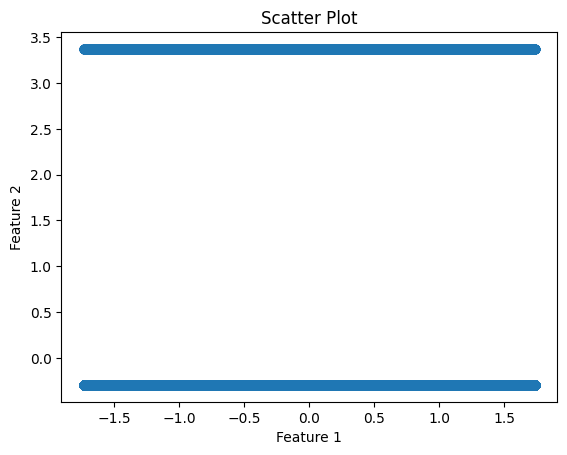

In [ ]:
# Scatter plot
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1])
plt.title("Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

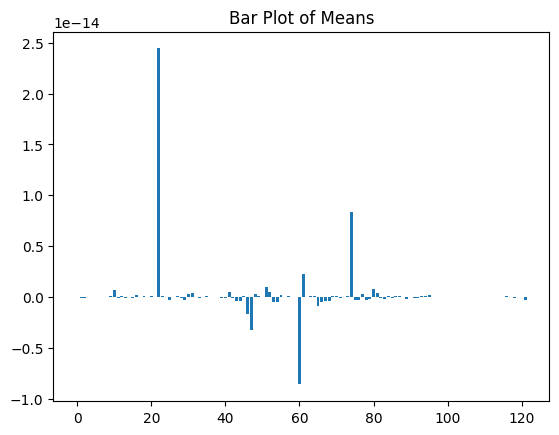

In [ ]:
# Bar Plot
plt.bar(range(len(mean_vals)), mean_vals)
plt.title("Bar Plot of Means")
plt.show()

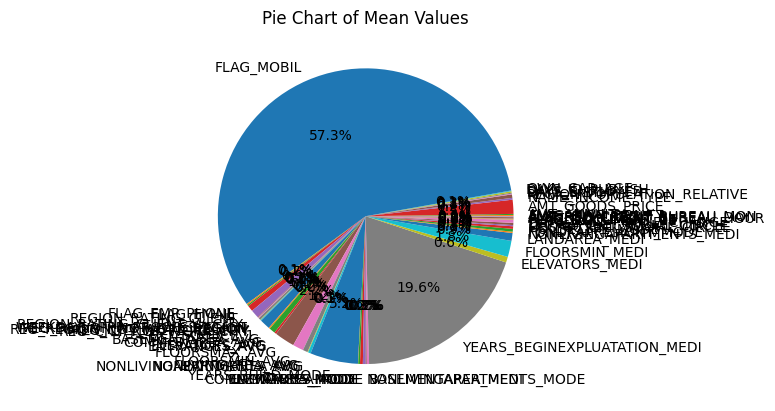

In [ ]:
plt.pie(mean_vals[mean_vals>=0], # Filter out negative values for pie chart
        labels=data.columns[mean_vals>=0], # Filter out corresponding labels
        autopct='%1.1f%%')
plt.title("Pie Chart of Mean Values")
plt.show()

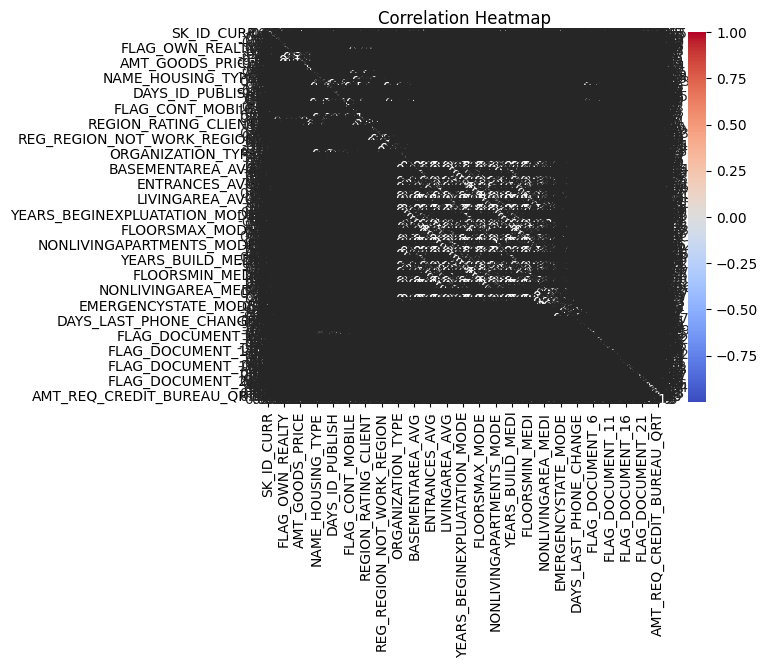

In [ ]:
# 4. Feature/Attribute Selection
# Correlation and heatmap
corr_matrix = data_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 5. Classification
X = data_scaled.drop(columns=['TARGET'])  # Replace 'target' with the actual target column name
y = data_scaled['TARGET']

# Convert y to discrete values if it's continuous
# Check if y has continuous values
if pd.api.types.is_numeric_dtype(y):
    # If continuous, convert to discrete using a threshold or binning strategy
    # For example, using a threshold of 0:
    y = (y > 0).astype(int)  # Values above 0 become 1, others become 0
    # Alternatively, use pd.qcut for binning into quantiles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape,y_test.shape

((246008,), (61503,))

In [ ]:
X_train.shape,X_test.shape

((246008, 121), (61503, 121))

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Train Accuracy:", accuracy_score(y_train, dt_pred)*100)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, dt_preds)*100)

Decision Tree Train Accuracy: 100.0
Decision Tree Test Accuracy: 84.95683137407931


In [ ]:
y_test# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, lr_pred)*100)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, lr_preds)*100)

Logistic Regression Train Accuracy: 91.90920620467628
Logistic Regression Test Accuracy: 91.90445994504333


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)
rf_preds = rf.predict(X_test)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rf_pred)*100)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_preds)*100)

Random Forest Train Accuracy: 99.99512210985009
Random Forest Test Accuracy: 91.95486399037446


In [ ]:
# Naive Bayes
#nb = GaussianNB()
#nb.fit(X_train, y_train)
#nb_pred = nb.predict(X_train)
#nb_preds = nb.predict(X_test)
#print("Naive Bayes Train Accuracy:", accuracy_score(y_train, nb_pred)*100)
#print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_preds)*100)

In [ ]:
features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
            'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
            'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
            'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
            'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
            'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
            'BASEMENTAREA_AVG']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Load dataset
#data = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data (1).csv")

# Define features and target


X = data.drop("TARGET",axis=1)
y = data['TARGET']  # Replace with your target variable

X_encoded = pd.get_dummies(X, drop_first=True)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Train the model
nb_pred = GaussianNB()
nb_pred.fit(X_train, y_train)
# Make Predictions
y_train_pred = nb_pred.predict(X_train)
y_test_preds = nb_preds.predict(X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

NameError: name 'nb_preds' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# ... (your existing code) ...

# Train the model
nb_model = GaussianNB()  # Create a new variable to store the model
nb_model.fit(X_train, y_train)  # Train the model

# Make Predictions
nb_pred = nb_model.predict(X_train)  # Predictions on training data
nb_preds = nb_model.predict(X_test)   # Predictions on test data

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, nb_pred)
test_accuracy = accuracy_score(y_test, nb_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.92
Test Accuracy: 0.92


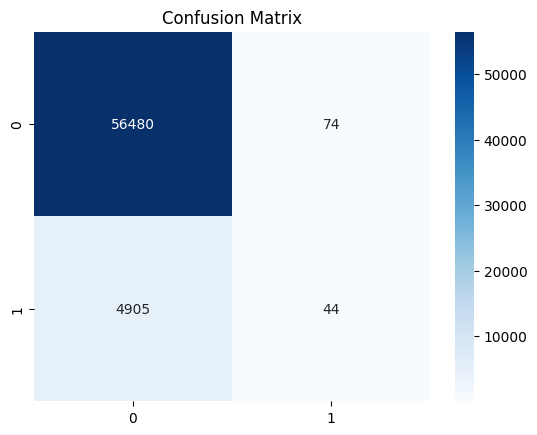

In [ ]:
conf_matrix = confusion_matrix(y_test, lr_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_preds=lr.predict(X_test)
print(confusion_matrix(y_test, y_preds, labels=[2,1,0]))
from sklearn.metrics import ConfusionMatrixDisplay

[[    0     0     0]
 [    0  2805  2144]
 [    0 26585 29969]]


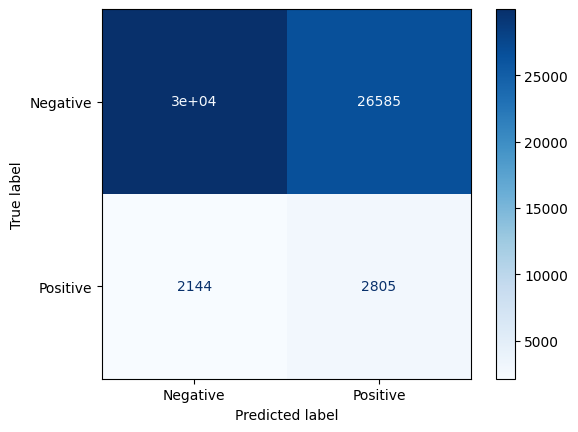

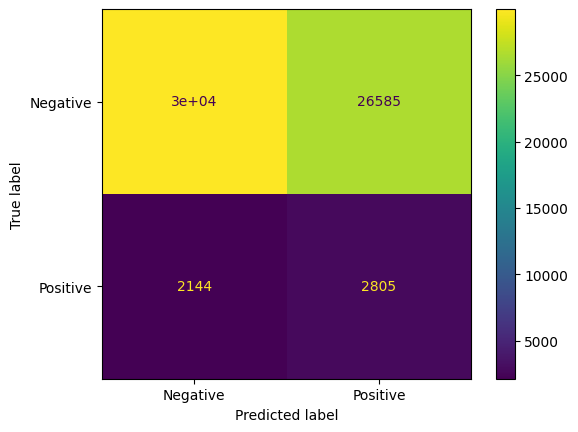

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    cmap='Blues',
    display_labels=['Negative', 'Positive']
)

disp.plot()
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_preds, labels=[2,1,0]))

[[    0     0     0]
 [    0  2805  2144]
 [    0 26585 29969]]


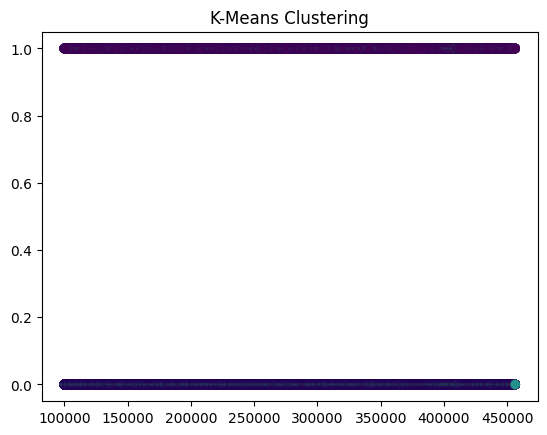

In [ ]:
# 6. Clustering
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# prompt: find out knn

from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Initialize KNN classifier with k=5 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_preds = knn.predict(X_test)

# Evaluate the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

# You can also print other evaluation metrics
print(classification_report(y_test, knn_preds))

KNN Test Accuracy: 91.39%
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.14      0.01      0.02      4949

    accuracy                           0.91     61503
   macro avg       0.53      0.50      0.49     61503
weighted avg       0.86      0.91      0.88     61503



In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
kmC=KNeighborsClassifier(n_neighbors=10)
kmC.fit(X_train,y_train)
kmC.score(X_train,y_train)*100

91.93034372865922

In [ ]:
kmC=KNeighborsClassifier(n_neighbors=10)
kmC.fit(X_test,y_test)
kmC.score(X_test,y_test)*100

91.95486399037446

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (your existing code) ...

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the training set
knn_train_preds = knn.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_preds)


# Make predictions on the test set
knn_preds = knn.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_preds)

# Print train and test accuracies together
print(f"KNN Train Accuracy: {knn_train_accuracy * 100:.2f}%")
print(f"KNN Test Accuracy: {knn_test_accuracy * 100:.2f}%")

# ... (rest of your code) ...///////////////////////

In [ ]:
# Cross Validation
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.91923971 0.91927092 0.91927092 0.91927092 0.91927092]
Average Cross-Validation Score: 0.9192646767919357


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 7. Neural Network
nn = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))
print("\nClassification Report:\n", classification_report(y_test, nn_preds))

Neural Network Accuracy: 0.9195323805342829

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Result Analysis
results = {
    "Model": ["Decision Tree", "Logistic Regression", "Random Forest", "Naive Bayes", "Neural Network"], # Removed 'SVM' from Model list
    "Accuracy": [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, nb_preds),
        accuracy_score(y_test, nn_preds),
    ]
}
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n", results_df)


Model Performance Comparison:
                  Model  Accuracy
0        Decision Tree  0.849568
1  Logistic Regression  0.919045
2        Random Forest  0.919549
3          Naive Bayes  0.919532
4       Neural Network  0.919532


In [ ]:
# Best Accuracy Table
print("\nBest Model:\n", results_df.loc[results_df['Accuracy'].idxmax()])